<div style="display:fill;
            border-radius:15px;
            background-color:#19d063;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
🪴🌱Optimizing Agricultural Production Engine🌳🌴

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#FEEFB3;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:black;"><b>👉 | Reading the Data</b></p>
</div>


In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:

df.head()

,N,P,K,Temparature,Humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
print('Size of Dataset is:', df.size)
print('Shape of Dataset is:', df.shape)
print('Columns of Dataset is:', df.columns)

Size of Dataset is: 17600
Shape of Dataset is: (2200, 8)
Columns of Dataset is: Index(['N', 'P', 'K', 'Temparature', 'Humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [5]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [7]:
df.isnull().sum()


N              0
P              0
K              0
Temparature    0
Humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# To check for duplicates
df.duplicated().sum()
#No duplicates present

0

In [9]:
df.describe()

,N,P,K,Temparature,Humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<h1 style='color:#BEF'><b> <span >|</span> EDA - Exploratory Data Analysis</b></h1>

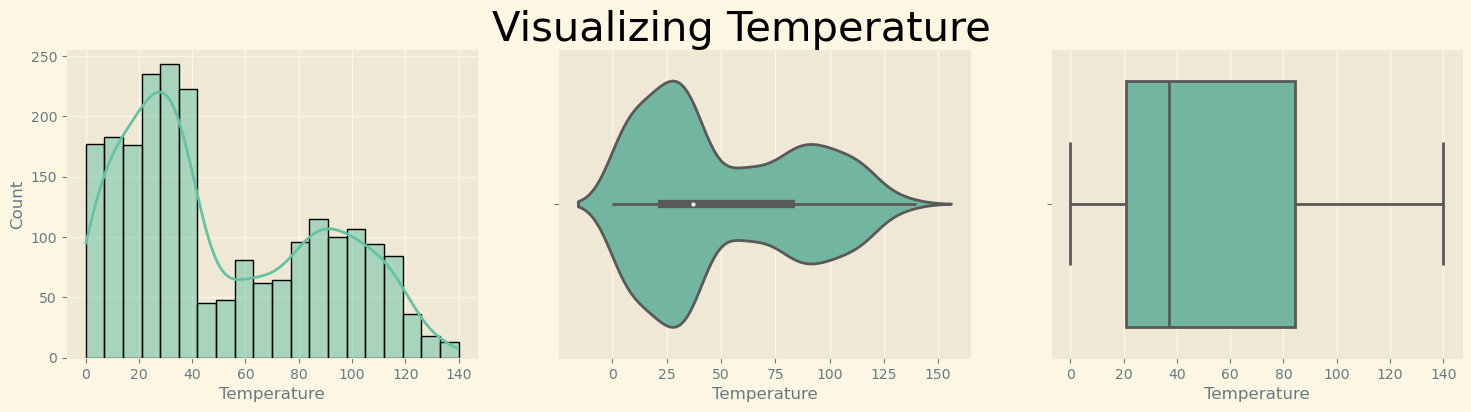

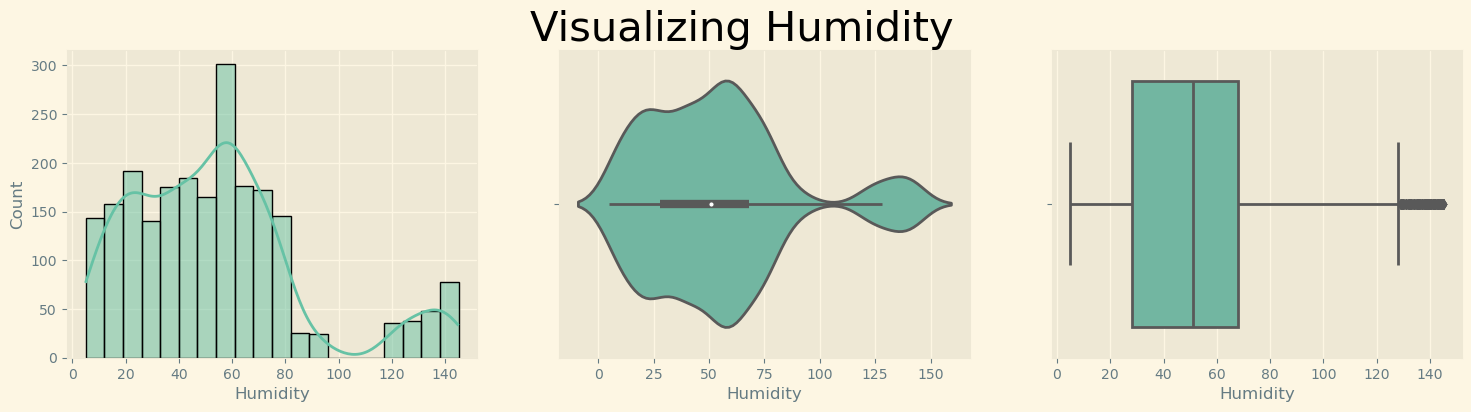

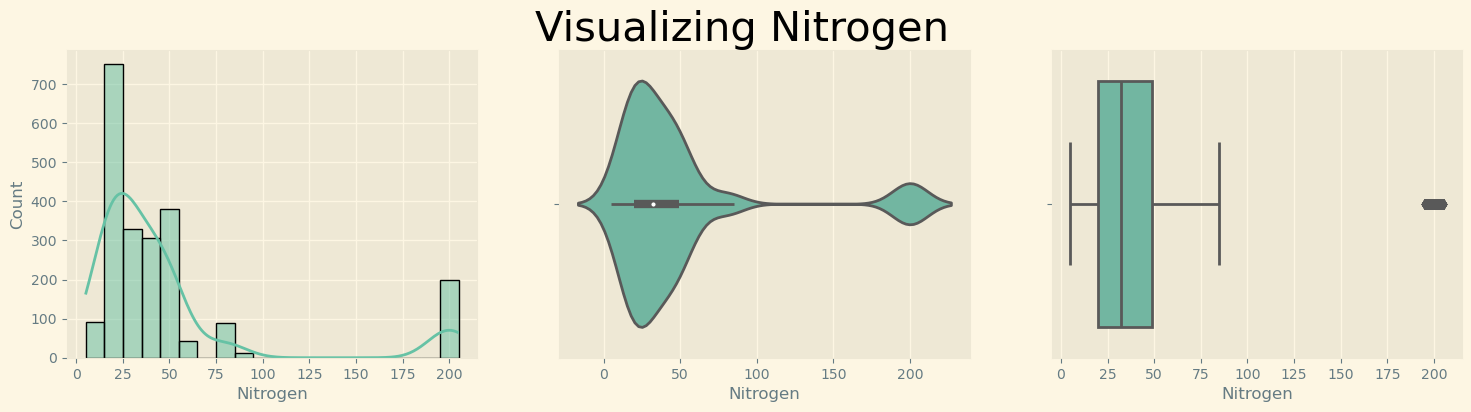

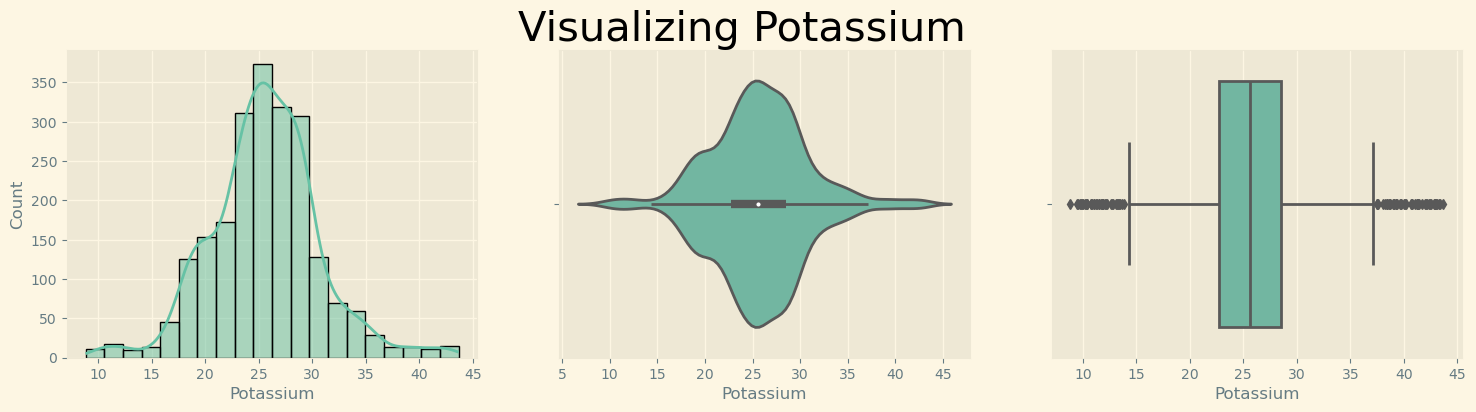

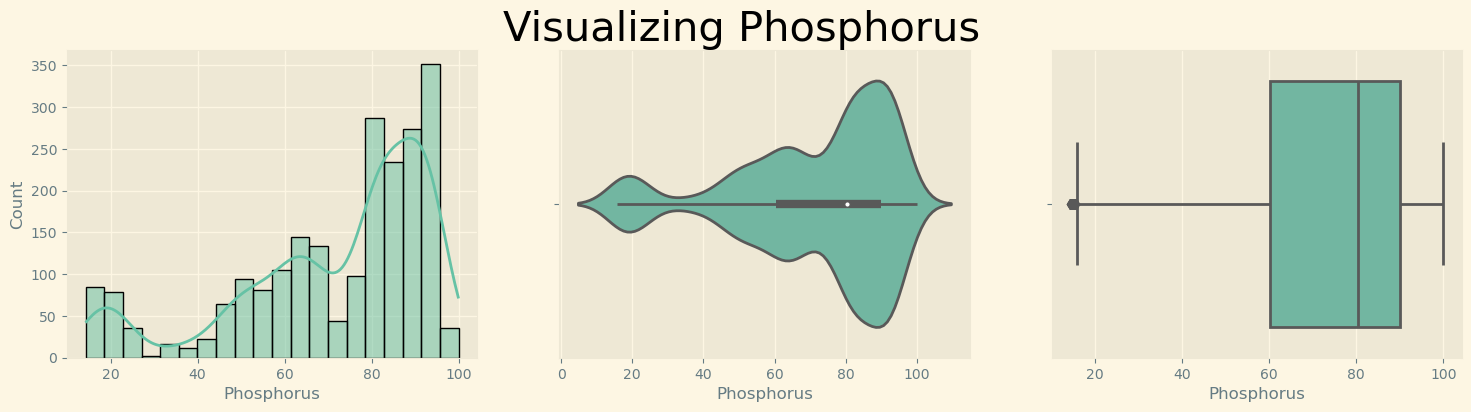

In [10]:
import plotly.express as px
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
df.columns = ['Temperature','Humidity','Nitrogen','Potassium','Phosphorus','Rainfall', 'pH','label']
plt.style.use('Solarize_Light2')
sns.set_palette("Set2")
for i in df.columns[:-3]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=30)

In [12]:
grouped = df.groupby(by='label').mean().reset_index()
grouped

,label,Temperature,Humidity,Nitrogen,Potassium,Phosphorus,Rainfall,pH
0,apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
1,banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
2,blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
3,chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
4,coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
5,coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
6,cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
7,grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
8,jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798
9,kidneybeans,20.75,67.54,20.05,20.115085,21.605357,5.749411,105.919778


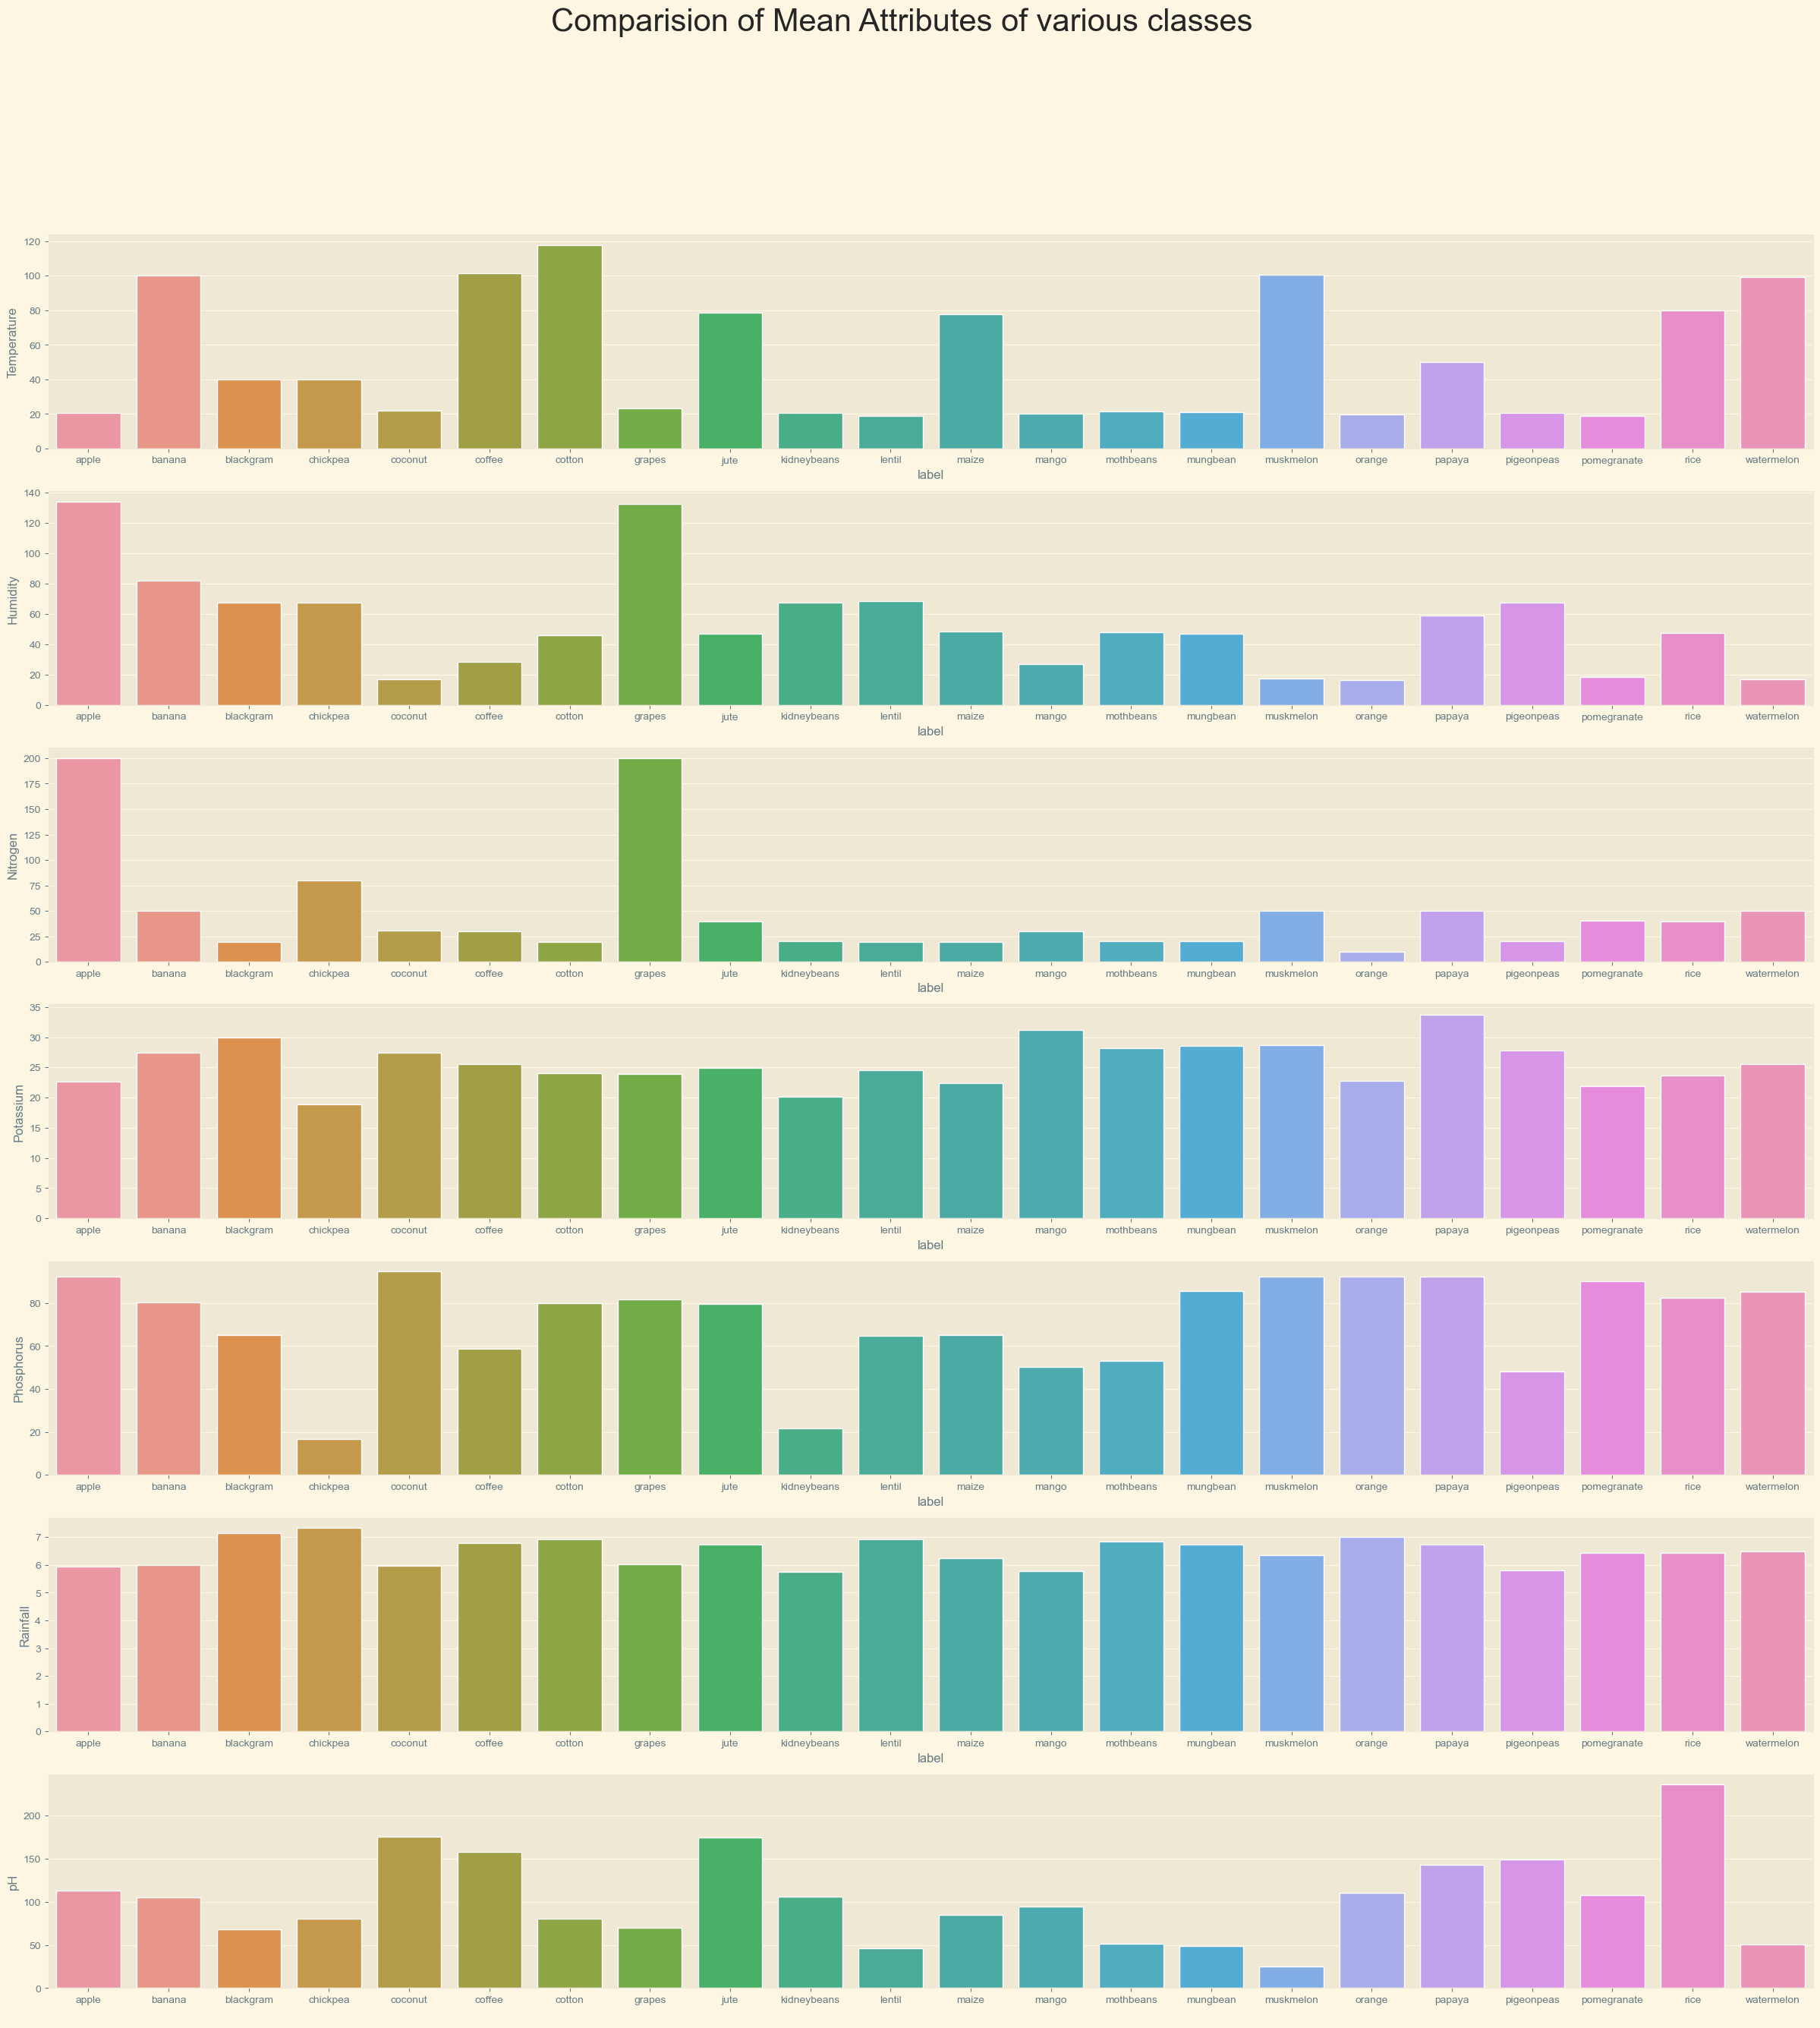

In [13]:
#Visulize data
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
fig,ax=plt.subplots(7,1,figsize=(30,30))
# create a bar plot of label vs temperature
for index,i in enumerate(grouped.columns[1:]):
    sns.set_theme(style="white", palette=None)
    sns.barplot(data=grouped,x='label',y=i,ax=ax[index])#data=grouped,x='Label',y=i,ax=ax[index]
    plt.suptitle("Comparision of Mean Attributes of various classes",size=30)
    
    
    plt.xlabel(" ")
# display the plot


#### Observations:
* Cotton requires most Nitrogen.
* Apple requires most Phosphorus.
* Grapes require most Potassium.
* Papaya requires a hot climate.
* Coconut requires a humid climate.
* Chickpea requires high pH in soil.
* Rice requires huge amount of Rainfall.
---------------------------------------------
### Top 5 most and Top 5 Least requiring crops :


In [14]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i,ascending=False)[:5][['label',i]].values:
         # for j ,k in grouped.sort_values(by=i)[:5][['Label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Most Temperature requiring crops:
--------------------------------
cotton --> 117.77
coffee --> 101.2
muskmelon --> 100.32
banana --> 100.23
watermelon --> 99.42
-------------------------------
Top 5 Most Humidity requiring crops:
--------------------------------
apple --> 134.22
grapes --> 132.53
banana --> 82.01
lentil --> 68.36
chickpea --> 67.79
-------------------------------
Top 5 Most Nitrogen requiring crops:
--------------------------------
grapes --> 200.11
apple --> 199.89
chickpea --> 79.92
watermelon --> 50.22
muskmelon --> 50.08
-------------------------------
Top 5 Most Potassium requiring crops:
--------------------------------
papaya --> 33.7238587388
mango --> 31.2087701513
blackgram --> 29.9733396789
muskmelon --> 28.663065756
mungbean --> 28.5257747353
-------------------------------
Top 5 Most Phosphorus requiring crops:
--------------------------------
coconut --> 94.84427180610001
papaya --> 92.4033876826
muskmelon --> 92.34

In [15]:
print(f'--------------------------------')
for i in grouped.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in grouped.sort_values(by=i)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')

--------------------------------
Top 5 Least Temperature requiring crops:
--------------------------------
lentil --> 18.77
pomegranate --> 18.87
orange --> 19.58
mango --> 20.07
pigeonpeas --> 20.73
-------------------------------
Top 5 Least Humidity requiring crops:
--------------------------------
orange --> 16.55
coconut --> 16.93
watermelon --> 17.0
muskmelon --> 17.72
pomegranate --> 18.75
-------------------------------
Top 5 Least Nitrogen requiring crops:
--------------------------------
orange --> 10.01
blackgram --> 19.24
lentil --> 19.41
cotton --> 19.56
maize --> 19.79
-------------------------------
Top 5 Least Potassium requiring crops:
--------------------------------
chickpea --> 18.8728467519
kidneybeans --> 20.1150846851
pomegranate --> 21.837841721999997
maize --> 22.3892039102
apple --> 22.6309424132
-------------------------------
Top 5 Least Phosphorus requiring crops:
--------------------------------
chickpea --> 16.8604394237
kidneybeans --> 21.6053567295
pige

<h1><b> <span style='color:#19d063;'>|</span> Data Preprocessing</b></h1>

In [16]:
#would be required in future to get the names of crops back from encoded form
names = df['label'].unique()
print(names)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [17]:
print(df['label'].unique())

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [18]:
df.head(200)

,Temperature,Humidity,Nitrogen,Potassium,Phosphorus,Rainfall,pH,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
195,90,57,24,18.928519,72.800861,6.158860,82.341629,maize
196,67,35,22,23.305468,63.246480,6.385684,108.760300,maize
197,60,54,19,18.748267,62.498785,6.417820,70.234016,maize
198,83,58,23,19.742133,59.662631,6.381202,65.508614,maize


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder=LabelEncoder()
df['label']=encoder.fit_transform(df['label'])


print(np.unique(df))

[  0.          1.          2.        ... 295.9248796 298.4018471
 298.5601175]


In [20]:
df.head()


,Temperature,Humidity,Nitrogen,Potassium,Phosphorus,Rainfall,pH,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


##### Here I have encoded the target values to its respective numerical value. It is necessary because our machine learning model won't be able to understand strings!

In [21]:
X=df.drop(['label'],axis=1)
y=df['label']

In [22]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

##### Parameters and its use:
* test_size = Denotes what proportion of total samples should be given to testing set - Here 30%.
* shuffle - The dataset contains all the classes and its samples one after one. So it is necessary to shuffle the dataset to avoid any bias.
* random_state - To produce replicable results.
* stratify - It makes even distribution of the classes between train and test set.

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()
#................................................#


,Temperature,Humidity,Nitrogen,Potassium,Phosphorus,Rainfall,pH
0,-1.335936,0.417499,-0.535091,0.378274,-0.489416,0.105457,-1.006138
1,1.797538,0.874355,-0.061709,-0.056432,0.352421,-1.102431,0.037615
2,-1.308923,0.234757,-0.554816,-0.672000,-2.173304,-0.662710,-0.486121
3,-0.282441,0.752527,-0.554816,-1.248506,-2.271540,-1.031842,-0.422218
4,-1.173860,-1.013983,-0.712610,-1.765899,1.047107,0.007107,0.121738


In [24]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

,Temperature,Humidity,Nitrogen,Potassium,Phosphorus,Rainfall,pH
0,-1.065809,0.752527,-0.515367,-0.328943,-2.185815,-0.682134,0.169358
1,-1.038796,-0.435299,-0.535091,0.665518,-0.385148,2.209376,-0.598399
2,-0.741657,0.112928,-0.574540,1.416190,-0.154494,1.006982,-0.545022
3,0.257813,0.143385,-0.219503,0.108439,0.344686,-0.518753,1.239871
4,0.446902,-0.374384,-0.160330,0.051858,0.735100,1.112860,0.896488


In [25]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (1540, 7), (1540,)
Train Data: (660, 7), (660,)


<h1><b>4 <span style='color:#19d063;'>|</span> Model Building</b></h1>

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | KNeighborsClassifier - 98%</b></p>
</div>

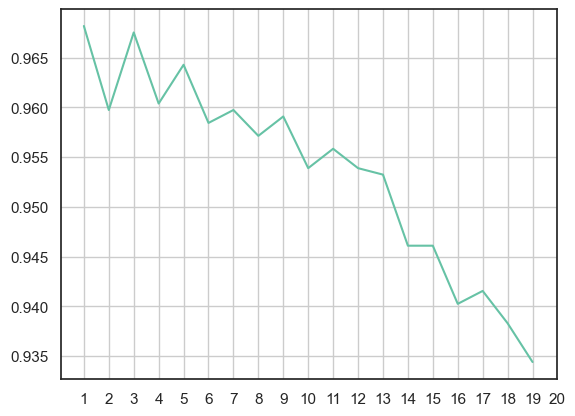

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.93      0.93      0.93        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.94      1.00      0.97        30
           7       1.00      1.00      1.00        30
           8       0.86      1.00      0.92        30
           9       0.97      1.00      0.98        30
          10       0.90      0.90      0.90        30
          11       1.00      0.93      0.97        30
          12       0.97      1.00      0.98        30
          13       0.97      0.93      0.95        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

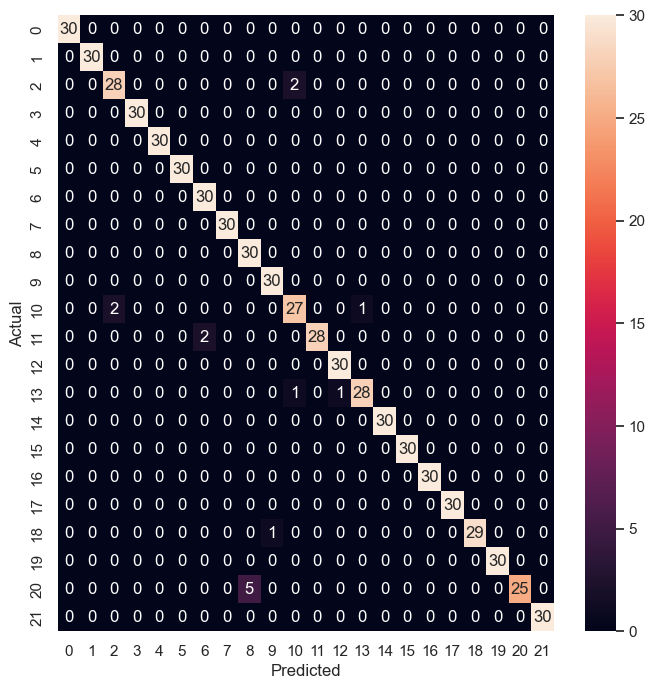

In [27]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Support Vector Classifier - 99%</b></p>
</div>

In [28]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)

print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      1.00      0.98        30
           7       1.00      1.00      1.00        30
           8       0.91      1.00      0.95        30
           9       1.00      1.00      1.00        30
          10       1.00      1.00      1.00        30
          11       1.00      0.97      0.98        30
          12       1.00      1.00      1.00        30
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Logistic Regression - 98%</b></p>
</div>

In [29]:
import warnings 
warnings.filterwarnings('ignore')
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       0.97      0.97      0.97        30
           7       1.00      1.00      1.00        30
           8       0.88      1.00      0.94        30
           9       1.00      1.00      1.00        30
          10       0.97      0.97      0.97        30
          11       0.97      0.97      0.97        30
          12       1.00      1.00      1.00        30
          13       0.97      0.97      0.97        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Random Forest Classifier - 99%</b></p>
</div>

In [30]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
print(classification_report(y_test,y_pred_rcv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       1.00      0.97      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.94      1.00      0.97        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       0.97      1.00      0.98        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#2b2b2b;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | LGBM Classifier - 100%</b></p>
</div>

In [32]:

import lightgbm as lgb

# Transform labels back to string form

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1329
[LightGBM] [Info] Number of data points in the train set: 1540, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGB

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.97      1.00      0.98        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.97      1.00      0.98        30
           9       1.00      1.00      1.00        30
          10       1.00      0.97      0.98        30
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        30
          13       0.97      1.00      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        30
          17       1.00    

In [33]:
#prediction_test = names.inverse_trpredictionform(prediction_test)
prediction = encoder.inverse_transform(model.predict(np.array([[30, 40, 60, 80, 20, 3, 500]])))
print("The suggested crop for given climatic condition is:", prediction)

    

The suggested crop for given climatic condition is: ['apple']


In [39]:
df[df['label'] == '2'].head()

,Temperature,Humidity,Nitrogen,Potassium,Phosphorus,Rainfall,pH,label


In [37]:
df.tail(20)

,Temperature,Humidity,Nitrogen,Potassium,Phosphorus,Rainfall,pH,label
2180,80,18,31,24.029525,58.848806,7.303033,134.680397,5
2181,101,31,26,26.708975,69.711841,6.861235,158.860889,5
2182,103,33,33,26.717174,50.501485,7.131436,126.807398,5
2183,93,26,27,24.592457,56.468296,7.288212,137.704405,5
2184,104,35,28,27.510061,50.666872,6.983732,143.995555,5
2185,116,36,25,27.578476,58.525343,6.172090,156.681037,5
2186,107,38,29,26.650693,57.566957,6.351182,145.105065,5
2187,101,33,33,26.972516,62.018363,6.908671,142.861079,5
2188,107,31,31,23.171246,52.978412,6.766184,153.120164,5
2189,99,16,30,23.526521,65.443409,6.392792,186.172820,5
